# TODO

1. Rearrange - Loading dataset, essential EDA, analyze target variable, analyze categorical variable, create new cols, long-format, analyze continous variable, relationships
2. 

## Import Modules

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [56]:
sns.set_palette(palette='coolwarm')

## Loading the Dataset

The following steps loads the dataset from the given URL into a pandas dataframe named `df`

In [57]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df = pd.read_csv(songs_url)

## Performing essential EDA using pandas methods

1. Shape
2. Info
3. Missing Values
4. Unique Values

First, we I find the dimensionality of the pandas dataframe using the `df.shape` method. This tells how many rows, columns are there in the dataframe. In this case it is 32833 rows and 23 columns

In [4]:
df.shape

(32833, 23)

Then, I'm exploring the datatypes, count of not-null values in every column of the dataset using the `df.info()` method

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Also, below is the description of each of the column in the dataset

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |

Next, I look to see **number of missing values** for each column. This is important to know so that I can elimate columns with too many missing values as those columns won't provide much insights about the dataset

In [6]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

The above analysis shows that only three columns `track_name`, `track_artist`, `track_album_name` have missing values and that too _very minimal number of rows_ with missing value.  So far, I have not dropped any columns based on missing values.

It is now time to look at **number of unique values** for each columns. Columns with too many unique values may not be informative or may lead to overfitting, while columns with too few unique values may not provide enough discriminative power.

In [7]:
df.nunique(dropna=False)

track_id                    28356
track_name                  23450
track_artist                10693
track_popularity              101
track_album_id              22545
track_album_name            19744
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [8]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [9]:
df.describe(include='object')

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
count,32833,32828,32828,32833,32828,32833,32833,32833,32833,32833
unique,28356,23449,10692,22545,19743,4530,449,471,6,24
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,progressive electro house
freq,10,22,161,42,139,270,308,247,6043,1809


* Based on the above analysis `track_id`, `track_album_id` have too many unique values so might not add a lot of value in our analysis and can be removed from the dataset
* We could also remove `playlist_id`, `playlist_name` since those are identifier columns
* `playlist_subgenre` can also be removed as we also `playlist_genre`. The rationale here is that the data represented by `playlist_subgenere` will also have similar representation if we use `playlist_genre`. So, no need to have two columns that serve the same purpose
* `track_artist` can also be removed as there are far too many artist name and will not be valuable for our analysis

In [58]:
# df.drop(['track_id','track_album_id','playlist_id','track_artist','playlist_subgenre'], inplace=True, axis=1)

We also see that nuber of unique values in the `track_name` is 23449 while the number of rows is 32828. This tells us that there is more than one entry per song. We can confirm this by doing the following - grouping by based on `track_name` and `playlist_name` to see if a song is present in more than one playlist.

TODO: We need to decide how we are going to handle the duplicates

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

## Visualizing Continous Variables

To visualize continous variable we will be using Histograms with KDE plots

In [125]:
df_features = df.select_dtypes('number').copy()
df_features.drop(['track_popularity_bin'], axis=1, inplace=True)

In [126]:
df_objects = df.select_dtypes('object').copy()

In [127]:
id_cols = ['rowid', 'track_popularity_bin'] + df_objects.columns.to_list()
# id_cols = ['rowid'] + df_objects.columns.to_list() + ['track_popularity_bin']

In [128]:
df_lf = df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=id_cols, value_vars=df_features.columns)

In [129]:
df_lf

,rowid,track_popularity_bin,track_id,track_name,track_artist,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,release_year_bin,variable,value
0,0,1,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,recent,track_popularity,66.0
1,1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,recent,track_popularity,67.0
2,2,1,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,recent,track_popularity,70.0
3,3,1,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,recent,track_popularity,60.0
4,4,1,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,recent,track_popularity,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459657,32828,0,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,recent,release_year,2014.0
459658,32829,0,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,recent,release_year,2013.0
459659,32830,0,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,recent,release_year,2014.0
459660,32831,0,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,recent,release_year,2014.0


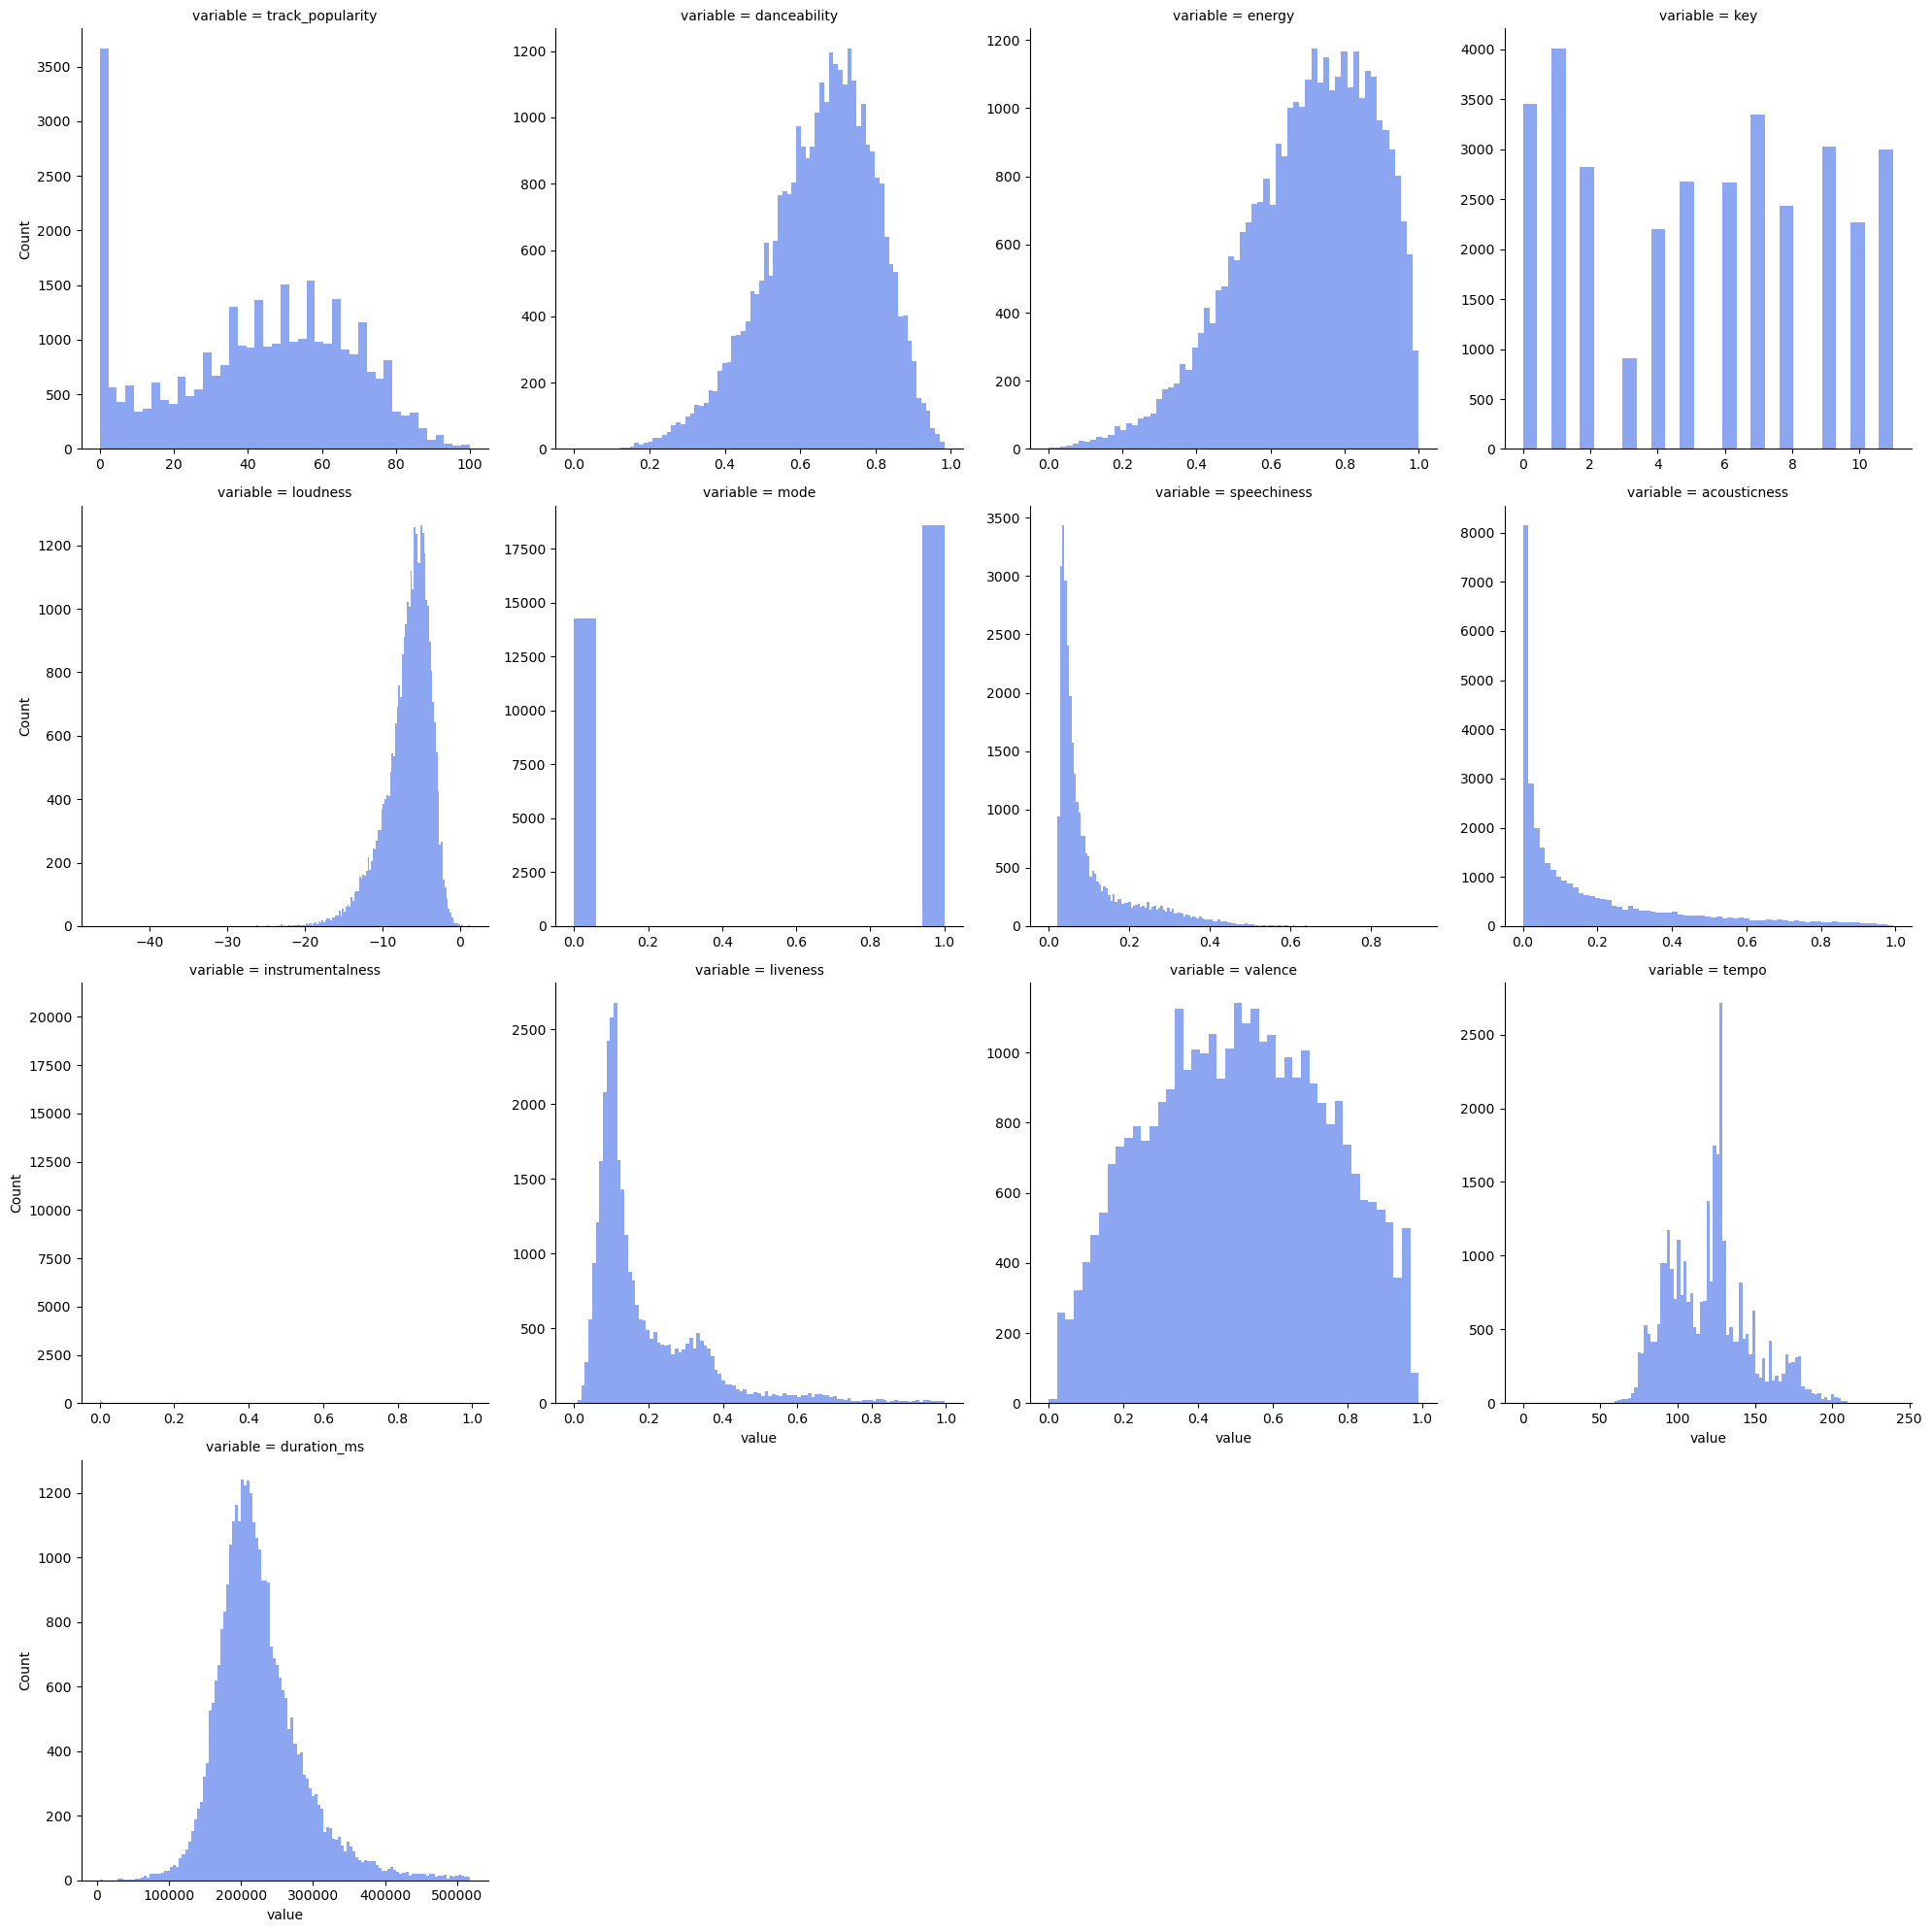

In [30]:

sns.displot(data = df_lf, x='value', col='variable', kind='hist',
            facet_kws={'sharex': False, 'sharey': False},
            common_bins=False,
            col_wrap=4)

plt.show()

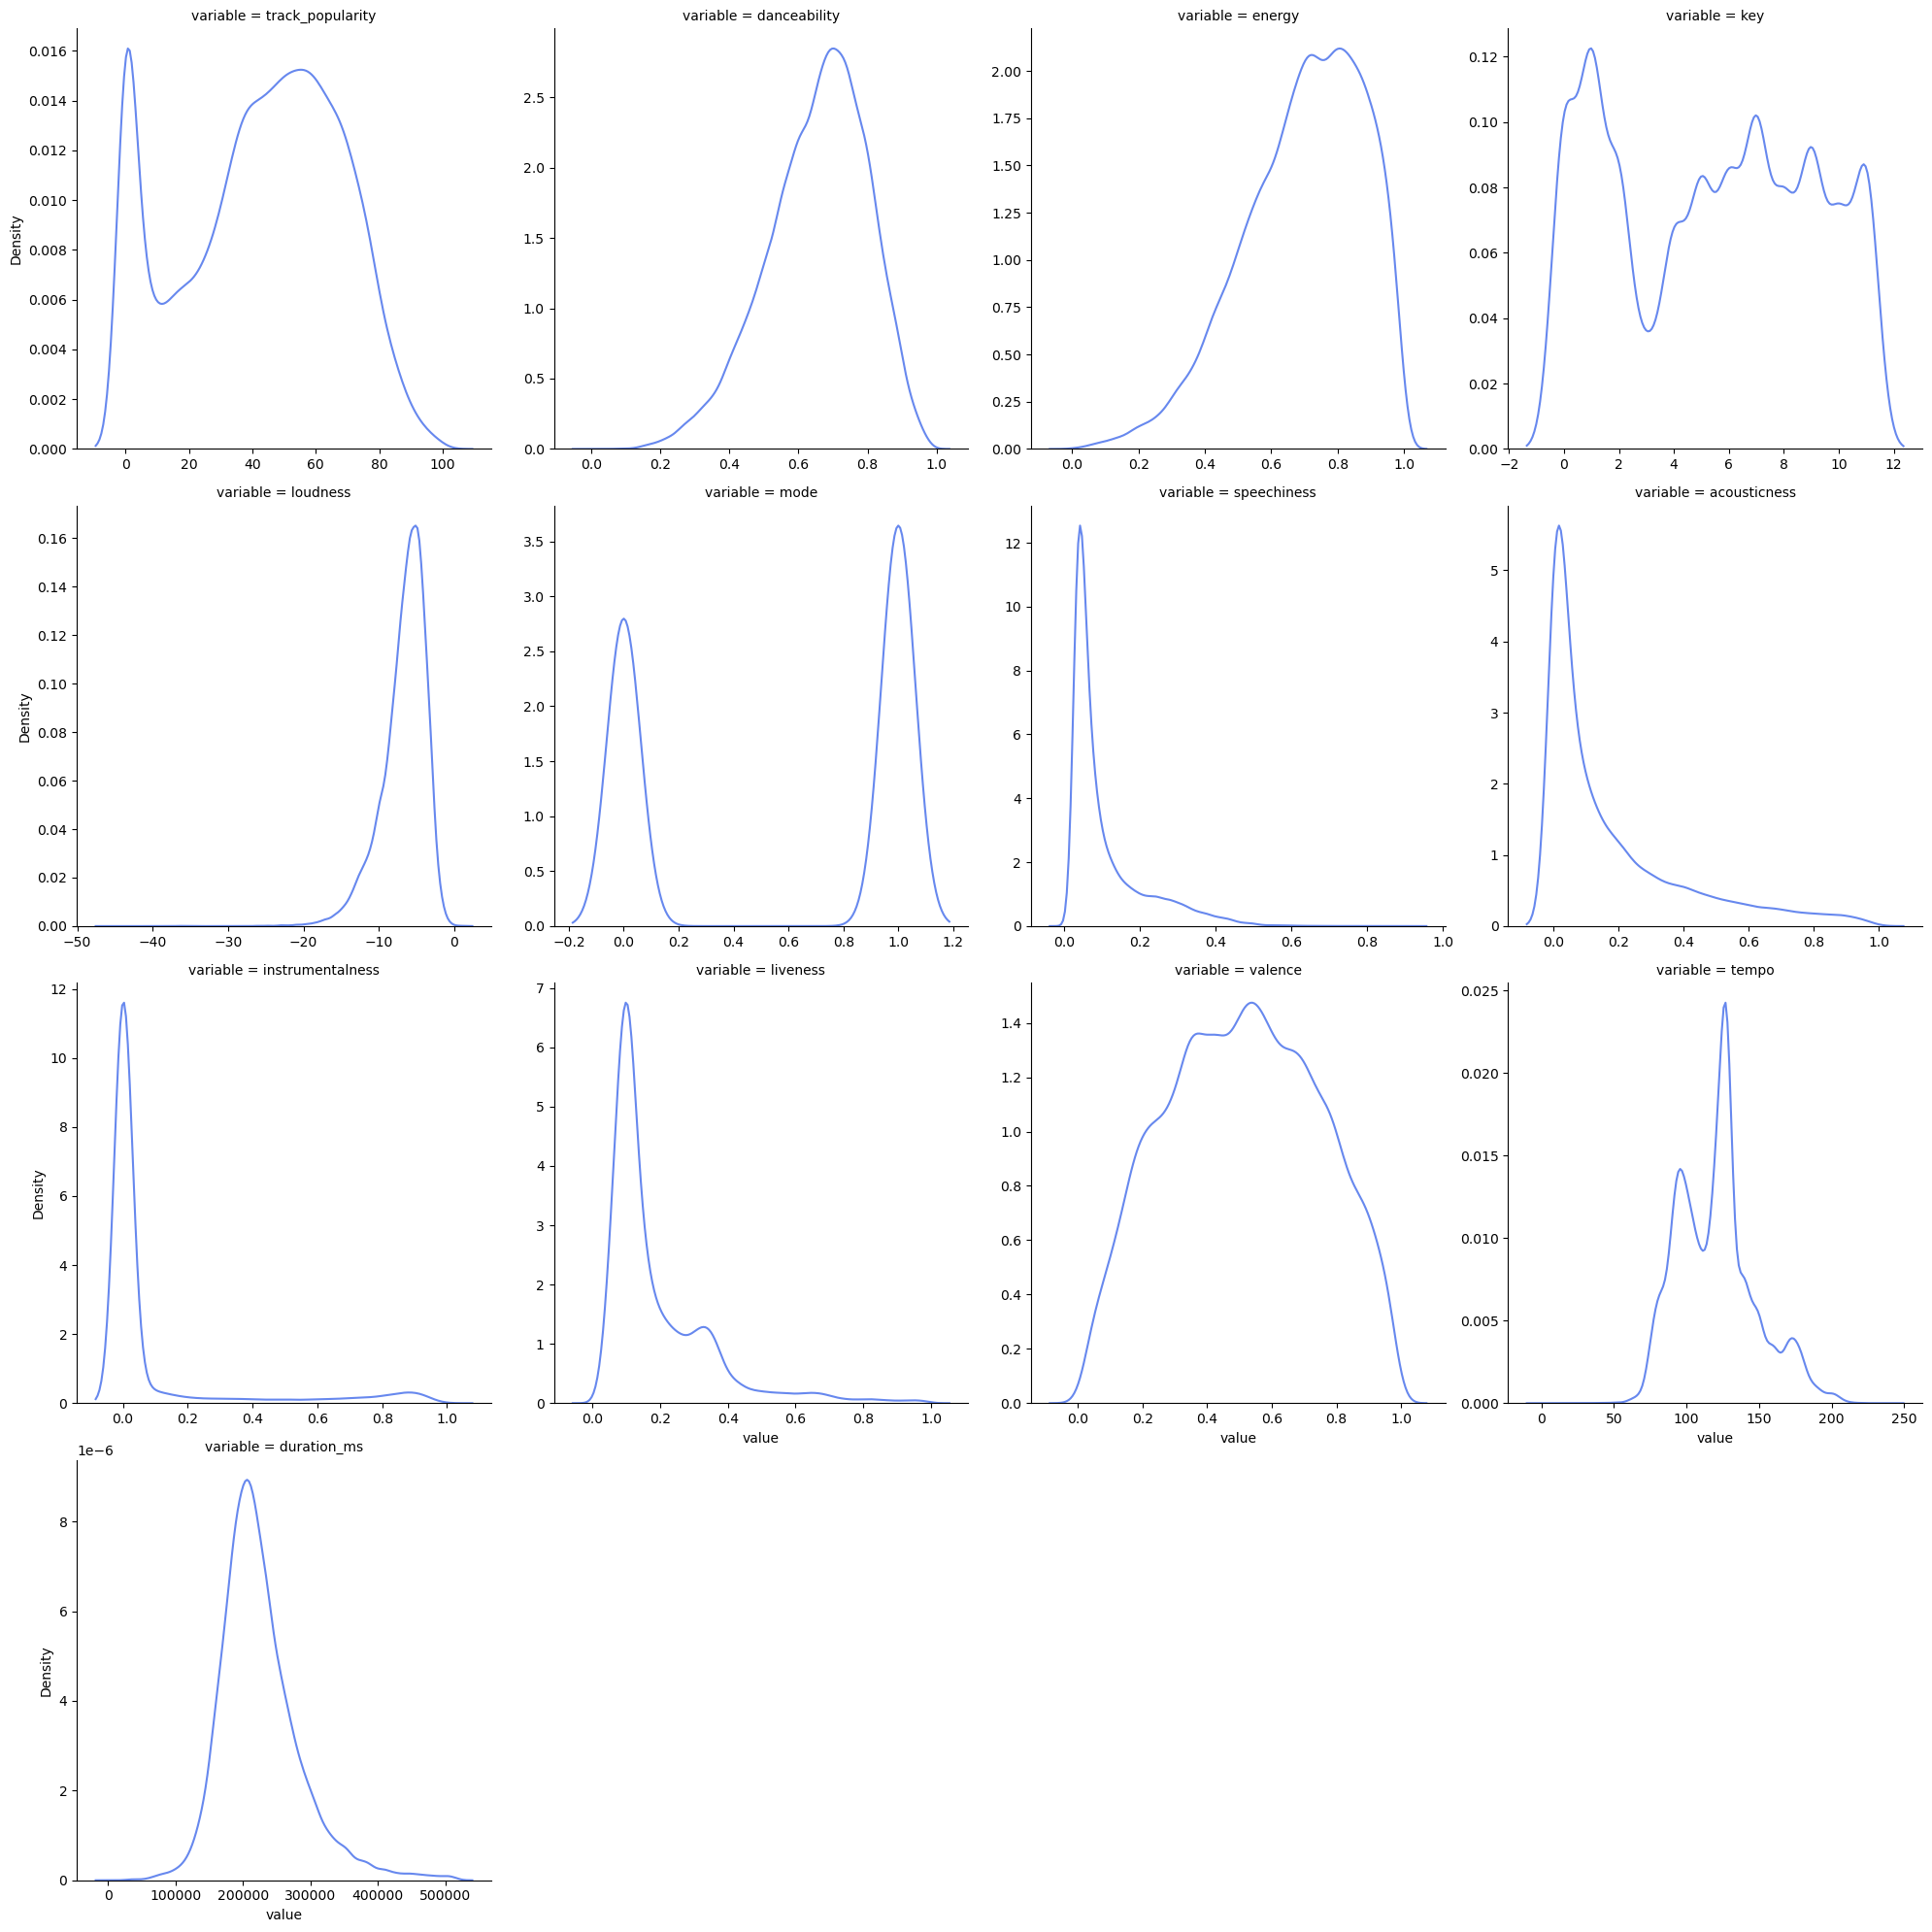

In [29]:
sns.displot(data = df_lf, x='value', col='variable', kind='kde',
            facet_kws={'sharex': False, 'sharey': False},
            col_wrap=4,
            common_norm=False)

plt.show()

In [ ]:
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots using Matplotlib
nrows, ncols = 4,4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))
axes = axes.flatten() 

# Iterate over continuous variables and plot histograms using Seaborn
for i, var in enumerate(continuous_vars):
    ax = sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    ax.lines[0].set_color('blue')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)



# Show the plot
plt.show()

In [ ]:
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots using Matplotlib
nrows, ncols = 4,4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 12))
axes = axes.flatten() 

# Iterate over continuous variables and plot histograms using Seaborn
for i, var in enumerate(continuous_vars):
    ax = sns.boxplot(data=df, x=var, ax=axes[i])
    ax.set_title(var)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)



# Show the plot
plt.show()


### Observation
We can see that  speechiness, instrumentalness, liveness, acousticness are skewed right.

loudness, mode, time_signature are skewed left.

Only danceability, energy, valence, tempo have normal distribution.

Before we can use the data for modeling, we must transform the left and right skewed features have more symmetrical and bell-shaped distributions.

## Analyzing target/output variable `track_popularity`

Above histogram shows that track_popularity is mostly normally distributed but the value 0 has lot more entries that other values. We can further confirm that using the following boxplot

<Axes: xlabel='track_popularity'>

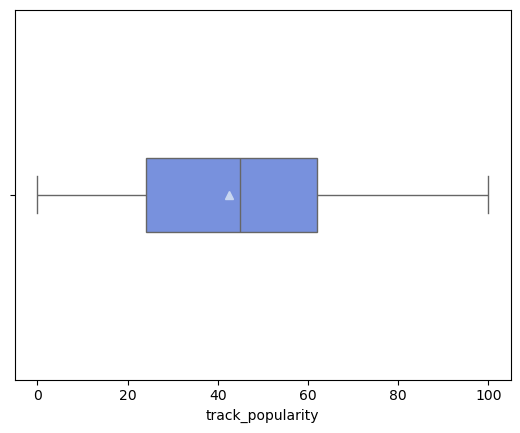

In [35]:
sns.boxplot(x=df["track_popularity"], showmeans=True, width=0.2)

**This also shows that although track_popularity is an integer column it is not a continous output. The values are between 0 and 100. A linear regression would require the output to be continous. Since that is not the case this can be considered a classification problem**

In [69]:
df['track_popularity_bin'] = np.where( df.track_popularity > 50, 1, 0 )

In [70]:
df.track_popularity_bin.value_counts(normalize=True)

track_popularity_bin
0    0.574757
1    0.425243
Name: proportion, dtype: float64

In [ ]:
sns.catplot(data = df, x='release_year_bin', kind='count', height=7)

plt.show()

In [ ]:
sns.catplot( data = df, x='playlist_genre', hue='track_popularity_bin', kind='count')

plt.show()

In [ ]:
sns.catplot( data = df, x='release_year_bin', hue='track_popularity_bin', kind='count')

plt.show()

In [ ]:
sns.catplot( data = df, col='release_year_bin', hue='track_popularity_bin', x = 'playlist_genre', kind='count')

plt.show()

In the recent years pop and rap are the popular genre while in the older years rock has been the popular genre

## Analyzing Categorical Variables

Based on the dataframe info we can determine that following columns are categorical variables

1. track_id
2. track_name
3. track_artist
4. track_album_id
5. track_album_name
6. track_album_release_date
7. playlist_name
8. playlist_id
9. playlist_genre
10. playlist_subgenre




In [ ]:
sns.catplot(data=df, x="track_name", y="track_artist", kind="bar")

In [ ]:
# Basic Analysis

df.describe(include='object')

* There are far too many unique values in the columns `track_album_name`, `track_name`, `track_artist`, `playlist_name`. This makes these columns not very useful for training a model and it is not practical to show visualization for these columns

* Identifier columns like `track_id`, `track_album_id` and `playlist_id` will also not be very useful. We can drop these columns before training a model. We also need to check if there are duplicate data for `track_id` and make a decision on how to handle the duplicates

### Create new columns

The given data presents us with the opportunity to create additional columns. These new columns may have an impact on the target variable. 

In this case, I have used  the column `track_album_release_date` to create two new columns `release_year` and `release_month`

In [96]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],  format='mixed')

In [97]:
df['release_year'] = df.track_album_release_date.dt.year

In [ ]:
sns.catplot(data = df, y='release_year', kind='count', height=10, aspect=2)

plt.show()

💡 As seen above, the dataset is mostly made of songs released in the recent years rather than older years. This suggests that we can probably create one more variable that represents the release_year in two buckets. We can put songs released after 2010 in one bucket and songs released before 2010 in another

In [101]:
df['release_year_bin'] = np.where( df.release_year < 2010 , 'older', 'recent')

In [ ]:
sns.catplot(data = df, x='release_year_bin', kind='count', height=7)

plt.show()

In [ ]:
df['release_month'] = df.track_album_release_date.dt.month

In [ ]:
sns.catplot(data = df, y='release_month', kind='count', height=11, aspect=1.5)

plt.show()

💡 Let's visualize additional categorical variables - `key` and `mode`

Although, `key` and `mode` are numeric columns, since there are less unique values these can be considered as categorical variables



In [ ]:
sns.catplot(data = df, y='key', kind='count', height=10, aspect=2)

In [ ]:
sns.catplot(data = df, y='mode', kind='count', height=10, aspect=2)

## Visualize Relatiopnships

### Categorial to Continuous

#### Release Year Vs Track Popularity

In [ ]:
sns.boxplot(data=df, x="release_year_bin", y="track_popularity", showmeans=True)

The above observation tells us that songs released recently have higher popularity compared to the songs released in the older years. This gives us a good indication that `release_year` can have impact on the `popularity`

#### Release Month Vs Track Popularity

In [ ]:
sns.catplot(data=df, x="release_month", y="track_popularity", kind='point', aspect=2, linestyle='none')

#### Key Vs Track Popularity

In [ ]:
sns.catplot( data = df, x='key', y='track_popularity', kind='point', linestyle='none')

plt.show()

Songs with higher popularity tend to have higher value for `key`

#### Mode Vs Track Popularity

In [ ]:
sns.catplot( data = df, x='mode', y='track_popularity', kind='point', linestyle='none')

plt.show()

Songs with higher popularity tend to have 1 as the `mode`

#### Playlist Genre Vs Playlist Subgenre

In [66]:
pd.crosstab(df.playlist_genre, df.playlist_subgenre)

playlist_subgenre,album rock,big room,classic rock,dance pop,electro house,electropop,gangster rap,hard rock,hip hop,hip pop,...,new jack swing,permanent wave,pop edm,post-teen pop,progressive electro house,reggaeton,southern hip hop,trap,tropical,urban contemporary
playlist_genre,,,,,,,,,,,,,,,,,,,,,
edm,0,1206,0,0,1511,0,0,0,0,0,...,0,0,1517,0,1809,0,0,0,0,0
latin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,949,0,0,1288,0
pop,0,0,0,1298,0,1408,0,0,0,0,...,0,0,0,1129,0,0,0,0,0,0
r&b,0,0,0,0,0,0,0,0,0,1256,...,1133,0,0,0,0,0,0,0,0,1405
rap,0,0,0,0,0,0,1458,0,1322,0,...,0,0,0,0,0,0,1675,1291,0,0
rock,1065,0,1296,0,0,0,0,1485,0,0,...,0,1105,0,0,0,0,0,0,0,0


This shows that the subgenre are part of genre thus resulting in high correlatio

In [137]:
sns.catplot(data = df_lf, x='track_popularity_bin', y='value', col='variable', col_wrap=2,
            kind='box',
            showmeans=True,
            sharey=False)

plt.show()

ValueError: Could not interpret value `release_year` for `hue`. An entry with this name does not appear in `data`.

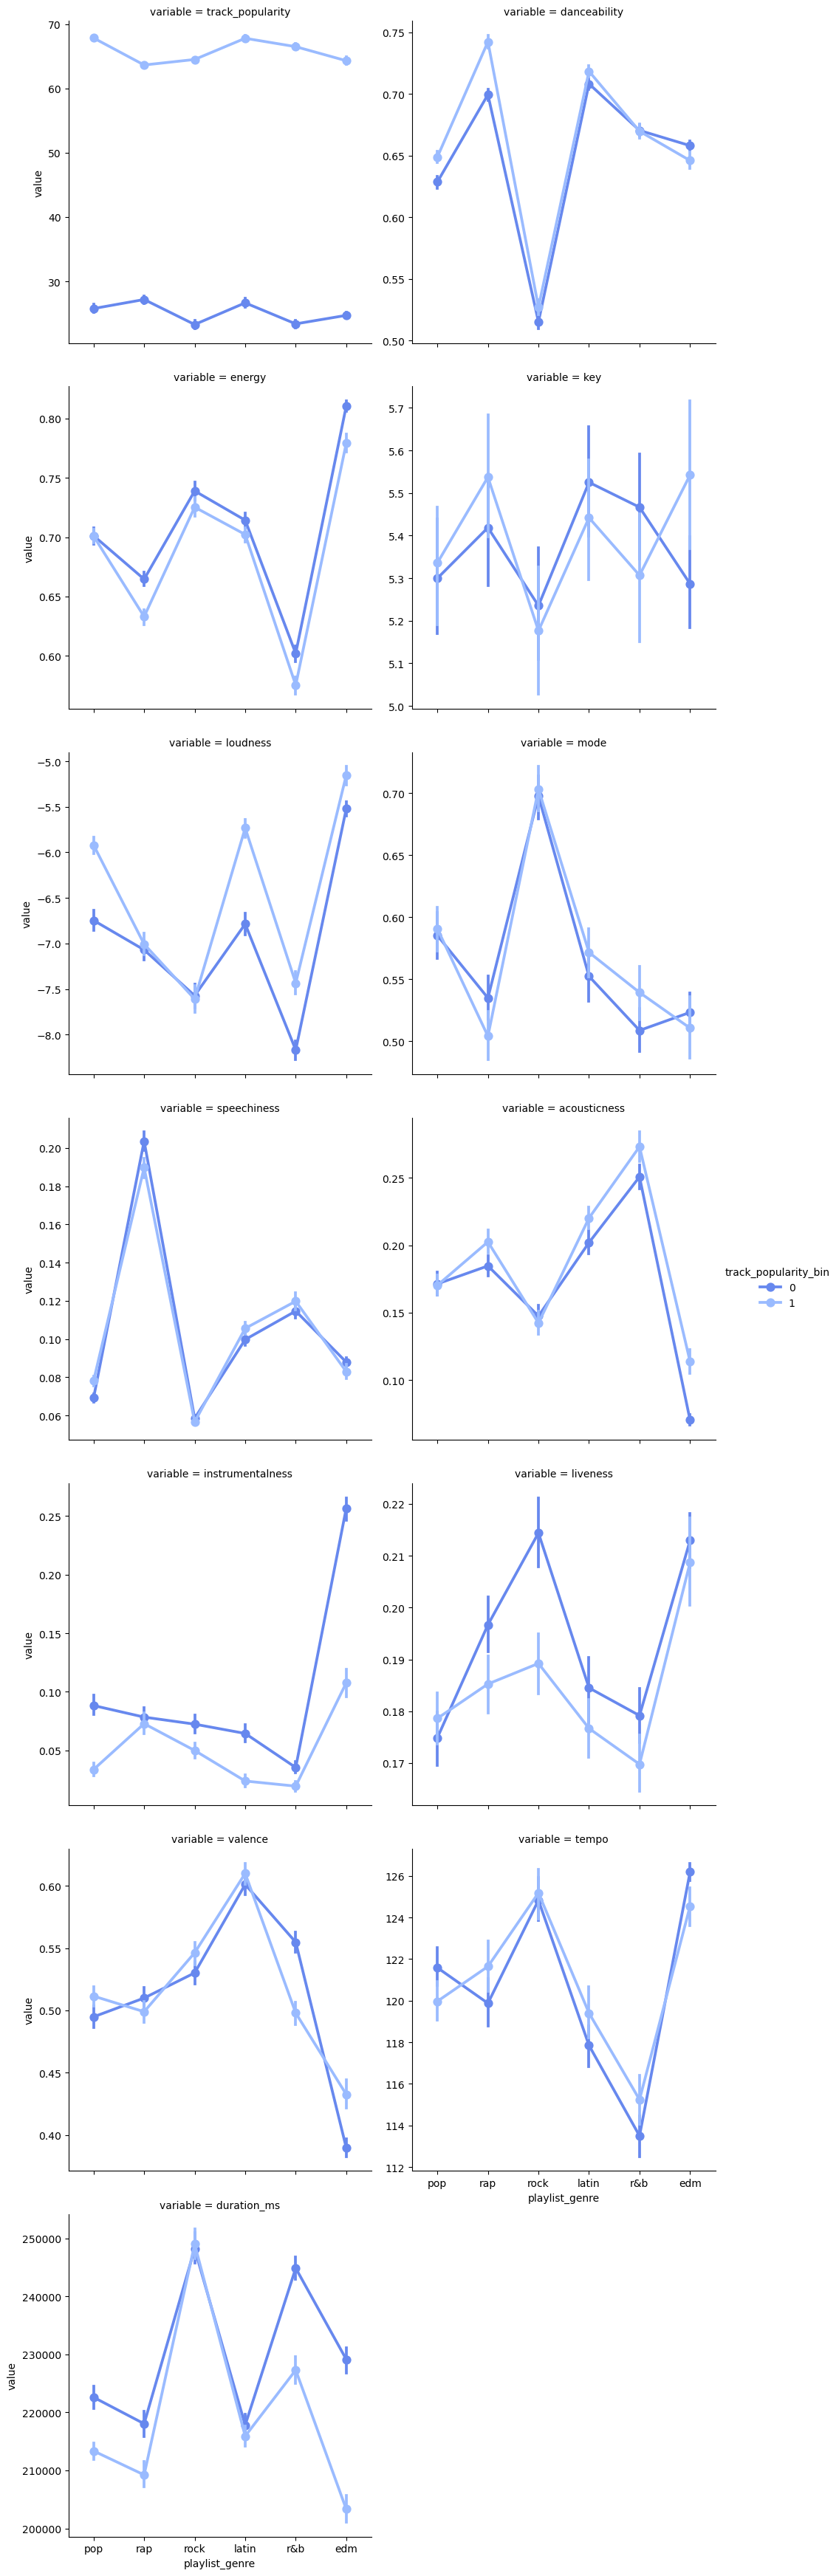

In [52]:
sns.catplot(data = df_lf, x='playlist_genre', y='value', col='variable', col_wrap=2,
             hue='track_popularity_bin',
            kind='point',
            sharey=False)

plt.show()

________________________________________________

## Duplicate Analysis

In [ ]:
grouped = df.groupby(['track_name']).\
aggregate(num_track_pop_values = ('track_popularity', 'nunique'),
          num_valence_values = ('valence', 'nunique'),)

In [ ]:
multiple_combinations = grouped[
    (grouped['num_track_pop_values'] > 1) | (grouped['num_valence_values'] > 1)
].index

In [ ]:
result = df[df['track_name'].isin(multiple_combinations)]

In [ ]:
result = result.sort_values('track_name')

In [ ]:
result

In [ ]:
sns.relplot(data = df, x='liveness', y='energy', hue='track_popularity_bin')

plt.show() 

In [ ]:
# Iterate over continuous variables and plot histograms using Seaborn
for i, var in enumerate(continuous_vars):
    sns.displot(data = df, x=var, hue='playlist_genre',
            common_norm=False, kind='kde', height=3.5, aspect=1)

In [ ]:
# boxplot for numerical columns
columns = ['track_popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=df[[f'{col}']], ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

In [ ]:
sns.catplot(data = df, x='playlist_genre', y='danceability', kind='box',
            showmeans=True,
            meanprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'black'})

plt.show()

In [ ]:
import warnings
top_n = 10
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['track_artist'].value_counts().head(top_n)
top_albums = df['track_album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['playlist_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="crest", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()

In [ ]:
for i, var in enumerate(continuous_vars):
    sns.displot(data = df, x=var, hue='track_popularity_binary',
            common_norm=False, kind='kde', height=3.5, aspect=1)

In [ ]:
sns.relplot(data=df,y='track_popularity',x='loudness', color = 'blue')

In [ ]:
sns.catplot(data = df, x='key', y='track_popularity', kind='point', linestyle='none')

plt.show()

In [ ]:
df.loc[df['track_popularity'] < 50]

## Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values

In [ ]:
p = sns.FacetGrid(data=df)
p.map(sns.displot,df, x='energy', hue='track_popularity_bin', kind='kde', common_norm=False)
p.set(xlim=(0, 1.0))
# sns.displot(data = df, x='energy', hue='track_popularity_bin', kind='kde', common_norm=False, height=3)
# # using common_norm=False  to remove the sample size effect
# plt.show()

In [114]:
df_lf

,rowid,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,variable,value
0,0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,track_popularity,66.0
1,1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,track_popularity,67.0
2,2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,track_popularity,70.0
3,3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,track_popularity,60.0
4,4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,track_popularity,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426824,32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,duration_ms,204375.0
426825,32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,duration_ms,353120.0
426826,32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,duration_ms,210112.0
426827,32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,duration_ms,367432.0


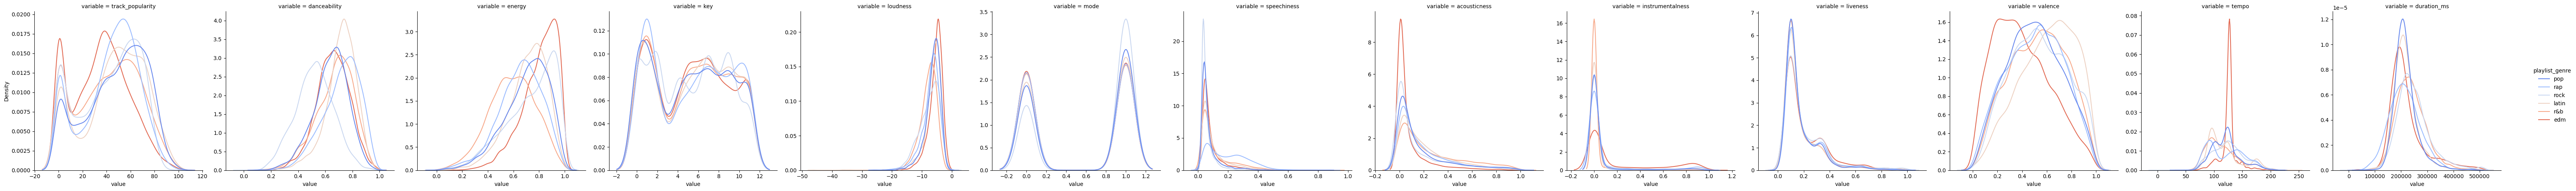

In [113]:
sns.displot(data = df_lf, x='value', col='variable', kind='kde',
            hue='playlist_genre',
            facet_kws={'sharex': False, 'sharey': False},
            common_norm=False)

plt.show()

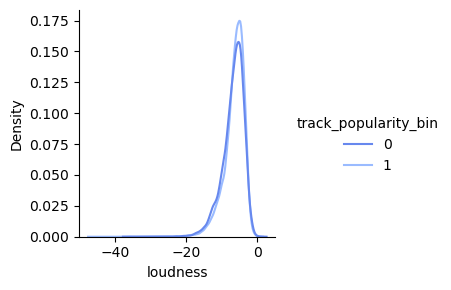

In [74]:
sns.displot(data = df, x='loudness', hue='track_popularity_bin', kind='kde', common_norm=False, height=3)
# using common_norm=False  to remove the sample size effect
plt.show()

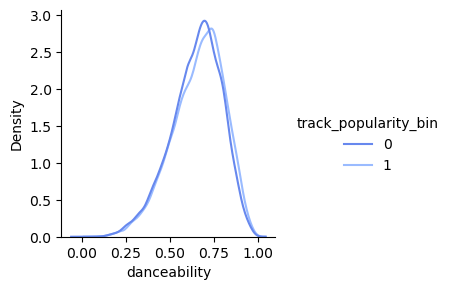

In [75]:
sns.displot(data = df, x='danceability', hue='track_popularity_bin', kind='kde', common_norm=False, height=3)
# using common_norm=False  to remove the sample size effect
plt.show()

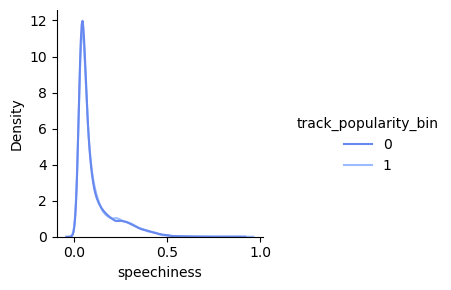

In [76]:
sns.displot(data = df, x='speechiness', hue='track_popularity_bin', kind='kde', common_norm=False, height=3)
# using common_norm=False  to remove the sample size effect
plt.show()

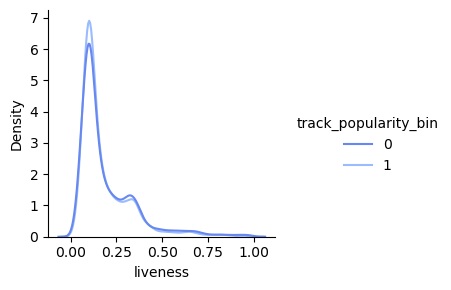

In [77]:
sns.displot(data = df, x='liveness', hue='track_popularity_bin', kind='kde', common_norm=False, height=3)
# using common_norm=False  to remove the sample size effect
plt.show()

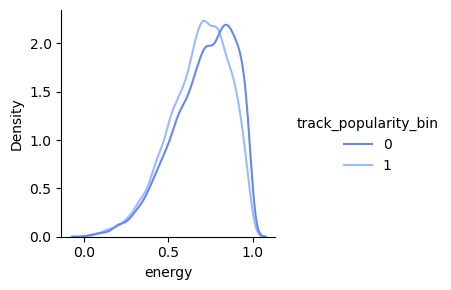

In [78]:
sns.displot(data = df, x='energy', hue='track_popularity_bin', kind='kde', common_norm=False, height=3)
# using common_norm=False  to remove the sample size effect
plt.show()

## Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique values.

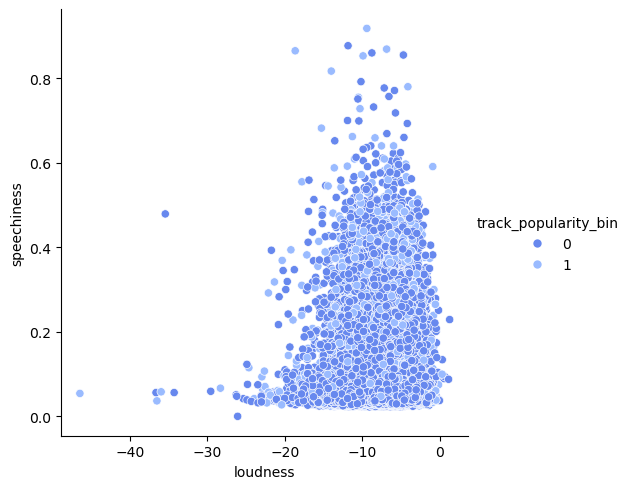

In [94]:
sns.relplot(data=df, x='loudness', y='speechiness', hue='track_popularity_bin')

plt.show()

## Visualize the counts of combinations between the response (outcome) and categorical inputs

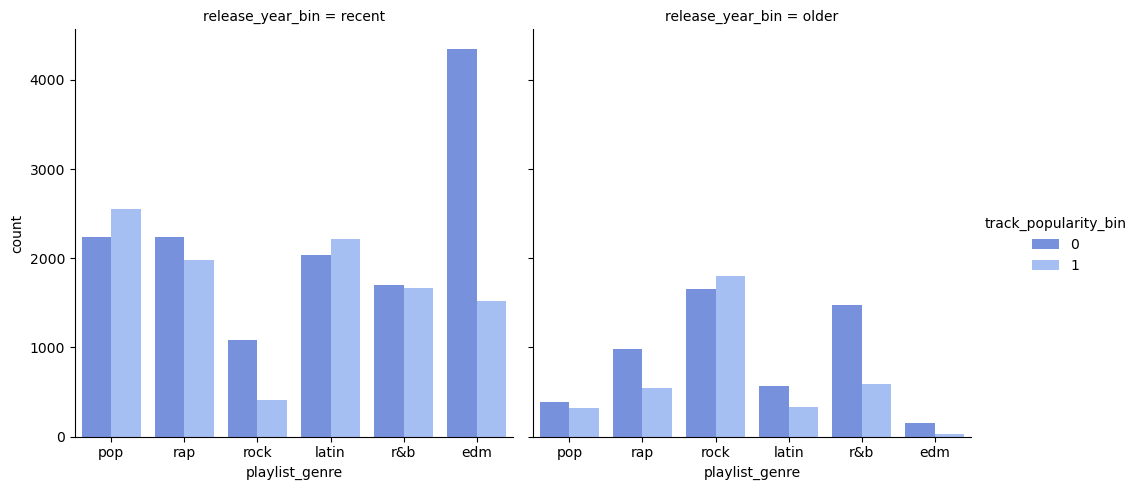

In [105]:
sns.catplot(data = df, x='playlist_genre', hue='track_popularity_bin', col='release_year_bin', kind='count')

plt.show()

`rock` used to be the most popular genre in the older years and it has been replaced by `pop` and `rap` in the recent years

In [110]:
df.playlist_genre.value_counts(normalize=True)

playlist_genre
edm      0.184053
rap      0.175007
pop      0.167728
r&b      0.165413
latin    0.157007
rock     0.150793
Name: proportion, dtype: float64

## DELETE BELOW

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile